In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
sns.set()

In [2]:
# get paths to all scoring .csv files
scoring_file_paths = glob('./results/scoring_*.csv')
print(scoring_file_paths)

['./results\\scoring_JJ.csv', './results\\scoring_mads.csv', './results\\scoring_Marc.csv', './results\\scoring_morten.csv', './results\\scoring_pia.csv', './results\\scoring_simon.csv']


In [3]:
# define some variables for plot formatting
model_map = {
    "cidx": ['r', -0.28],
    "mean": ['b', 0.28],
    "recon_mean": ['g', 0], 
}
model_names = [
    "Reaction Time Based Model",
    "Mean Image Model",
    "Reconstructed Mean Image Model",
]
model_colors = ['r', 'b', 'g']

In [4]:
def get_cols(df: pd.DataFrame, starts_with: str) -> pd.DataFrame:
    """Extract columns that starts with starts_with from df"""
    return df[df.columns[pd.Series(df.columns).str.startswith(starts_with)]]

In [5]:
# create barplot from DataFrame
def plot_scores_bar(df: pd.DataFrame, save_name: str) -> None:
    # get barplots over the continuum for all three methods
    _, ax = plt.subplots(1, 7, figsize=(14, 3), sharey=True)
    for colname in df:
        idx = 6 - int(colname.split('_')[-1])
        color, xd = model_map[colname.split('/')[-1][:-2]]

        scores, counts = np.unique(df[colname].values, return_counts=True)
        counts = counts / np.sum(counts)

        ax[idx].bar(scores + xd, counts, width=0.28, color=color)

    # formatting
    for i in range(7):
        ax[i].set_title(f'Smile strength {i}')
        ax[i].set_xticks([1, 2, 3, 4, 5])
    ax[0].set_ylabel('Frequency')
    ax[3].set_xlabel('Participant scoring')
    ax[3].legend(
        model_names, 
        loc='upper center', 
        bbox_to_anchor=(0.5, -0.2),
        fancybox=True, 
        shadow=True, 
        ncol=5
    )
    plt.savefig('./results/' + save_name, bbox_inches='tight')
    plt.show()

In [6]:
# create mean plot from DataFrame
def plot_scores_mean(df_m: pd.DataFrame, save_name: str) -> None:
    # Get DataFrames of mean and std for the 3 different methods 
    df_cidx = get_cols(df_m, 'cidx')
    df_mean = get_cols(df_m, 'mean')
    df_recon = get_cols(df_m, 'recon')

    # display error bar plot of the individual methods
    plt.figure(figsize=(12, 7))
    xs = np.arange(6, -1, -1)
    for idx, df in enumerate([df_cidx, df_mean, df_recon]):
        # get mean and std
        ys = df.loc['mean'].sort_index().values
        stds = df.loc['std'].sort_index().values

        # display error bar plot
        plt.errorbar(
            xs, ys, yerr=stds, 
            linewidth=2, elinewidth=1.6, capsize=6, 
            color=model_colors[idx], label=model_names[idx]
        )
    plt.ylabel('Participant mean scoring', fontsize=15)
    plt.xlabel('Smiling strength', fontsize=15)
    plt.title('Participant mean scoring for each of the three continua', fontsize=17)
    plt.legend(fontsize=13)
    plt.savefig('./results/' + save_name, bbox_inches='tight')
    plt.show()

# Scoring with

In [7]:
# load all .csv scoring files into a single DataFrame
scoring_files = []
for file_path in scoring_file_paths:
    scoring_files.append(pd.read_csv(file_path))
df_scores = pd.concat(scoring_files, axis=0, ignore_index=True)

# sort column names
df_scores = df_scores.reindex(sorted(df_scores.columns), axis=1)

In [8]:
# Create a new DataFrame of mean and std of scores
mean_scores = df_scores.apply(lambda col: [col.mean(), col.std()])
mean_scores.index = ['mean', 'std']
mean_scores.head()

,cidx_0,cidx_1,cidx_2,cidx_3,cidx_4,cidx_5,cidx_6,mean_0,mean_1,mean_2,...,mean_4,mean_5,mean_6,recon_mean_0,recon_mean_1,recon_mean_2,recon_mean_3,recon_mean_4,recon_mean_5,recon_mean_6
mean,3.850000,3.616667,3.050000,2.283333,1.433333,1.100000,1.050000,4.516667,4.066667,3.300000,...,1.383333,1.133333,1.050000,4.516667,3.866667,3.166667,2.466667,1.566667,1.200000,1.066667
std,0.898681,0.783120,0.790301,0.666172,0.563484,0.302532,0.219784,0.624138,0.685607,0.645716,...,0.523731,0.342803,0.286711,0.624138,0.891897,0.557436,0.724081,0.592800,0.403376,0.311729


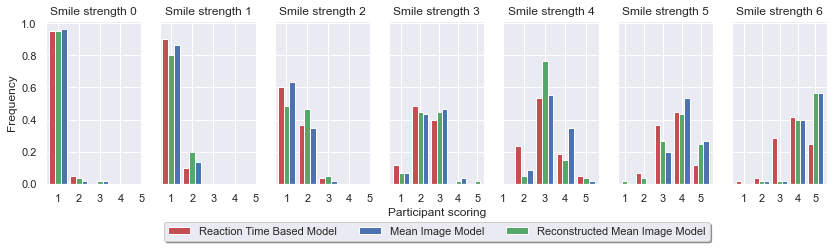

In [9]:
plot_scores_bar(df_scores, 'continua_eval_bar.png')

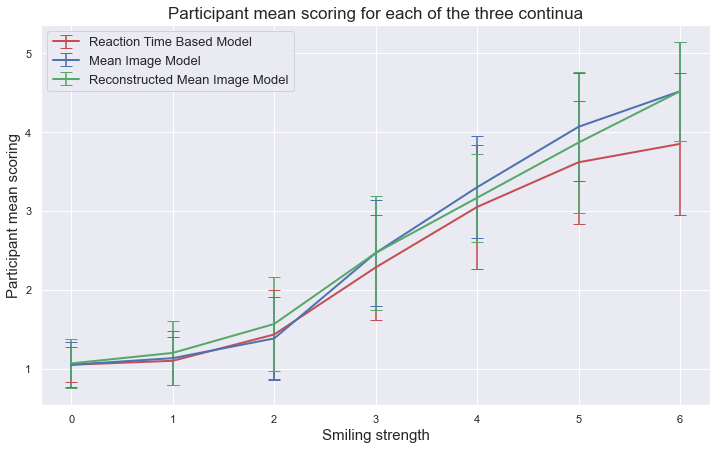

In [10]:
plot_scores_mean(mean_scores, 'continua_eval_err.png')

# Scoring without

In [11]:
# remove Simon, Marc and Janus
scoring_file_paths_2 = [
    path for path in scoring_file_paths 
    if not any(name in path for name in ['Marc', 'JJ', 'simon'])
]
print(scoring_file_paths_2)

['./results\\scoring_mads.csv', './results\\scoring_morten.csv', './results\\scoring_pia.csv']


In [12]:
# load all .csv scoring files into a single DataFrame
scoring_files = []
for file_path in scoring_file_paths_2:
    scoring_files.append(pd.read_csv(file_path))
df_scores_2 = pd.concat(scoring_files, axis=0, ignore_index=True)

# sort column names
df_scores_2 = df_scores_2.reindex(sorted(df_scores_2.columns), axis=1)

# Create a new DataFrame of mean and std of scores
mean_scores_2 = df_scores_2.apply(lambda col: [col.mean(), col.std()])
mean_scores_2.index = ['mean', 'std']
mean_scores_2.head()

,cidx_0,cidx_1,cidx_2,cidx_3,cidx_4,cidx_5,cidx_6,mean_0,mean_1,mean_2,...,mean_4,mean_5,mean_6,recon_mean_0,recon_mean_1,recon_mean_2,recon_mean_3,recon_mean_4,recon_mean_5,recon_mean_6
mean,3.400000,3.266667,2.766667,2.133333,1.266667,1.033333,1.0,4.533333,3.966667,3.166667,...,1.400000,1.066667,1.0,4.466667,3.733333,3.033333,2.400000,1.400000,1.100000,1.0
std,0.932183,0.784915,0.858360,0.730297,0.449776,0.182574,0.0,0.730297,0.808717,0.592093,...,0.563242,0.253708,0.0,0.730297,0.980265,0.556053,0.813676,0.498273,0.305129,0.0


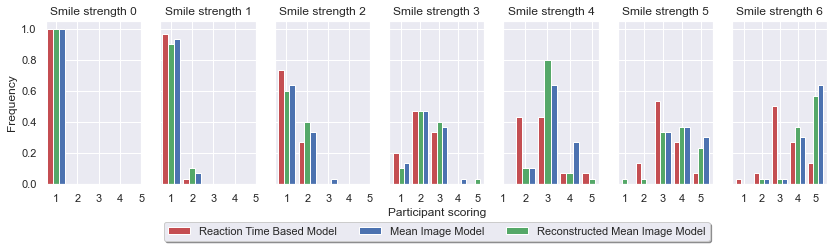

In [13]:
plot_scores_bar(df_scores_2, 'continua_eval_bar_2.png')

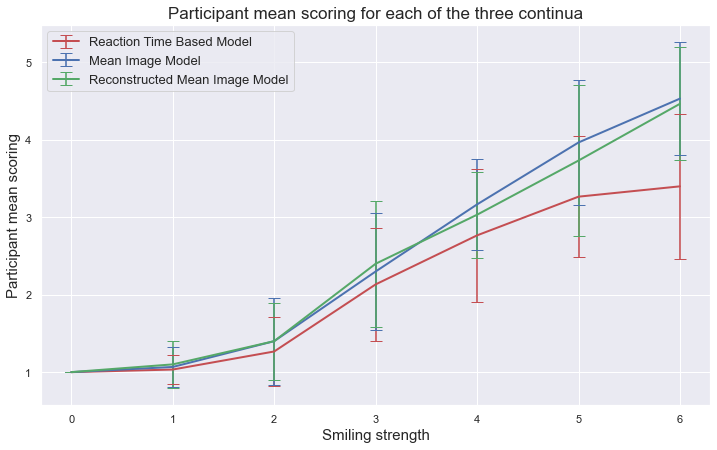

In [14]:
plot_scores_mean(mean_scores_2, 'continua_eval_err_2.png')